In [5]:
import pandas as pd
house_ds = pd.read_csv("Housing.csv")

In [6]:
house_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
house_ds["guestroom_binary"] = le.fit_transform(house_ds["guestroom"])
house_ds["mainroad_binary"] = le.fit_transform(house_ds["mainroad"])
house_ds["basement_binary"] = le.fit_transform(house_ds["basement"])
house_ds["hotwaterheating_binary"] = le.fit_transform(house_ds["hotwaterheating"])
house_ds["airconditioning_binary"] = le.fit_transform(house_ds["airconditioning"])
house_ds["prefarea_binary"] = le.fit_transform(house_ds["prefarea"])

In [8]:
house_ds=house_ds.drop(["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"],axis=1)

In [9]:
house_ds=house_ds.join(pd.get_dummies(house_ds["furnishingstatus"],dtype=int))
house_ds=house_ds.drop("furnishingstatus",axis=1)

In [10]:
house_ds

,price,area,bedrooms,bathrooms,stories,parking,guestroom_binary,mainroad_binary,basement_binary,hotwaterheating_binary,airconditioning_binary,prefarea_binary,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,2,0,1,0,0,1,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,0,0,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,1,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [11]:
house_ds.var()

price                     3.498544e+12
area                      4.709512e+06
bedrooms                  5.447383e-01
bathrooms                 2.524757e-01
stories                   7.525432e-01
parking                   7.423300e-01
guestroom_binary          1.465731e-01
mainroad_binary           1.215461e-01
basement_binary           2.280559e-01
hotwaterheating_binary    4.384781e-02
airconditioning_binary    2.163923e-01
prefarea_binary           1.800324e-01
furnished                 1.912439e-01
semi-furnished            2.434768e-01
unfurnished               2.203386e-01
dtype: float64

In [12]:
X=house_ds.drop("price",axis=1)
y=house_ds["price"]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
knn = KNeighborsClassifier()

In [14]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.014598540145985401

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.021897810218978103

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as MSE 
train_accuracies = {}
test_accuracies = {}
rmse_knn_arr = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    y_pred=knn.predict(X_test)
    mse_knn= MSE(y_test, y_pred)
    rmse_knn = mse_knn**(1/2)
    rmse_knn_arr[neighbor]=rmse_knn

print(rmse_knn_arr)

{1: 2036885.135315883, 2: 1980744.5544403892, 3: 2053648.8154254954, 4: 2085817.1736554618, 5: 2150227.8823765717, 6: 2172888.0301122535, 7: 2202562.3997929664, 8: 2232795.61128422, 9: 2237273.626150012, 10: 2189636.011351665, 11: 2213666.5251276675, 12: 2243219.6383289513, 13: 2273555.5410720487, 14: 2292441.649867548, 15: 2290367.5323790093, 16: 2272409.2128083366, 17: 2273363.6087545455, 18: 2279358.7976153344, 19: 2288606.324742918, 20: 2371884.78809036, 21: 2351148.968030793, 22: 2365189.561425913, 23: 2300545.8077742946, 24: 2252379.475574454, 25: 2456032.3002056153}


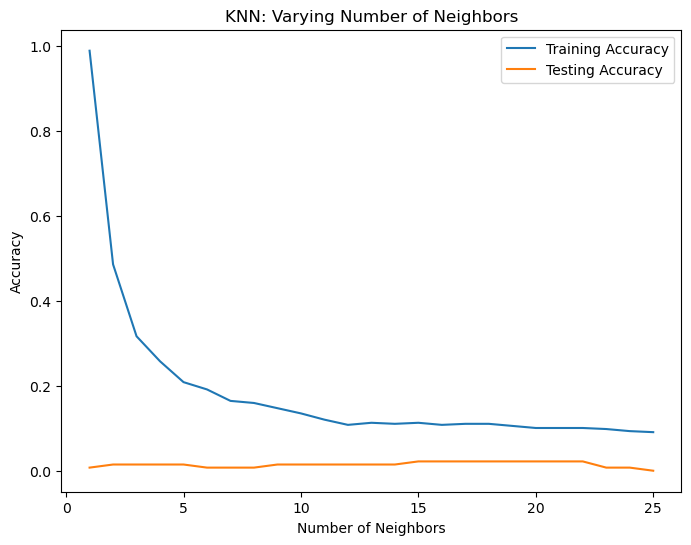

In [17]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error as MSE
y_pred=knn.predict(X_test)
mse_knn= MSE(y_test, y_pred)
rmse_knn = mse_knn**(1/2)
print(rmse_knn)

2456032.3002056153
